# Estimating the Value of $\pi$

We can use these computing resources to estimate the value of $\pi$ (3.1415926535...). https://en.wikipedia.org/wiki/Pi

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

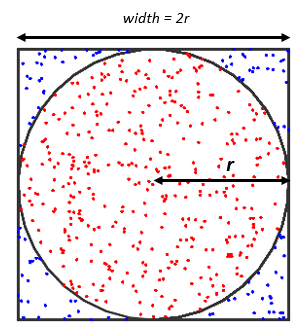

One method of estimating $\pi$ is through the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method). The approach works by randomly sampling or *throwing darts at* a unit square and determining how many of these "darts" are found inside a unit circle inscribed in that square (see the image above). This approach works because the area of the circle is equal to $\pi r^2$ and the area of the square is equal $(2r)^2$. Upon dividing the area of the circle by the area of the square, the value will be $\pi / 4$.

Let's look at an example of how this might work. In the cell below, we randomly generate two numpy arrays representing the x and y values for each of the `nsamples`. The values in the arrays are uniformly distributed from -1 to 1. If we plot all of these values and overlay a unit circle, you can see how the number of points can be used to estimate the area of the circle and square.

In [ ]:
nsamples = 100
x = np.random.uniform(-1,1, size = nsamples)
y = np.random.uniform(-1,1, size = nsamples)

plt.figure(figsize=(7,7))
place_darts = plt.scatter(x,y)
ax = plt.gca()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
circle2 = plt.Circle((0, 0), 1, fill=False)
ax.add_artist(place_darts)
ax.add_artist(circle2)
plt.show()

Perhaps this isn't clear after only `100` samples. What if we increase the number to `1000` or `10000` or `100000`? 

- <font color='red'>Do you expect the area estimation to get better or worse?</font>

- <font color='red'>What if we visualize this slightly differently? Let's color the points inside the unit circle blue and those outside of the unit circle red.</font>

In [ ]:
radii = np.sqrt(x*x + y*y)

plt.figure(figsize=(7,7))
plt.scatter(x[np.where(radii<=1)], y[np.where(radii<=1)], s=1, c='b', marker='.')
plt.scatter(x[np.where(~(radii<=1))], y[np.where(~(radii<=1))], s=1, c='r', marker='.')
plt.show()

Great! This should work for estimating the value of $\pi$. In order to do that, we will need to come up with a way to count how many randomly generated points are found with 1 unit of the origin. The overall algorithm looks like this:

1. Randomly picks values for x and y between -1 and 1.
2. Compute the two-dimensional distance between each x,y point and the origin.
3. Estimate the area of the circle as points inside of circle.
4. Divide the "area of circle" by the "area of square".
5. Multiply the quotient by 4.

## The Monte Carlo method
In the cell below, we have created a function called `monte_carlo_pi` which takes one argument: an integer 'n' representing the number of points to sample. Within the function, a `for` loop iterates over the n random points and at each iteration random values for x and y are generated between -1 and 1. The distance from the origin is computed and if the point is inside the unit circle, a counter `count` is increased by one. After the loop, the estimation of pi is return by multiplying 4 by the quotient of "area of circle" and "area of square".

In [ ]:
def monte_carlo_pi(n):
    # Monte Carlo method to approximate pi
    # n: number of random points to generate
    # Returns the approximate value of pi

    # Initialize counter for number of points inside circle
    count = 0

    # Iterate over n random points
    for _ in range(n):
        # Generate random x and y values between -1 and 1
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Check if the point lies inside the unit circle (distance from (0, 0) is less than 1)
        if np.sqrt(x**2 + y**2) < 1:
            count += 1

    # Approximate pi by multiplying the ratio of points inside the circle to total points by 4
    return 4 * count / n

Now that you have defined your `monte_carlo_pi` function. Let's test it to see how well it does. We'll start with just 1000 samples.

In [ ]:
# Set the number of points to generate per process
n = 1000

# Calculate the approximate value of pi
pi_approx = monte_carlo_pi(n)

# Print the final approximation
print(f"Final approximation of pi: {pi_approx :.10f}")

Not bad! With just 1000 samples, you can get a number pretty close to $\pi$. But what if you want a more accurate answer. Try increasing the number of sampling points to 1000 or 100,000. 

- What do you notice about the accuracy of your estimation? 
- Do you notice anything else about the calculation?

## Computing the average

You may have noticed that when you run the previous cell, you don't always get the same value for $\pi$ even when the number of samples remains unchanged. This is because the Monte Carlo approach relies on random values. Each time you run the cell, you generate a new set. *Note: you can stop this behavior by including the command `random.seed(0)` before you call the `monte_carlo_pi` function. This will generate the same set of 'random' numbers for you.*

We can exploit this nondeterministic behavior by calling the `monte_carlo_pi` function multiple times and averaging the results for $\pi$ at the end. This should give us a better approximation to the true value of $\pi$. We can also choose to visualize the distribution of values for $\pi$.

In [ ]:
# set the number of samples
n_samples = 10000

# set the number of runs
n_ests = 200

# array for values of pi in each run
pi_ests = []

# begin of the for loop
start = time.time()

# loop over number of runs and add 
# pi value to the pi_ests array
for i in range(n_ests):   
    pi_ests.append(monte_carlo_pi(n_samples))
    
# end of the for loop
t = time.time() - start

print("Number of runs = {:d}, time = {:2.4f}".format(n_ests, t))

# plot a histogram of the pi estimates
plt.figure()
plt.hist(pi_ests)
plt.xlim(3.0,3.3)
    
pi_est_mean = np.mean(pi_ests)
pi_est_std  = np.std(pi_ests)
print(f"pi_est_mean = {pi_est_mean :2.10f}, pi_est_std = {pi_est_std :2.10f}, samples = {n_samples :d}")

That looks great! But let's do it again for 100,000 samples. Observe how the distribution changes when more samples are evaluated. Also, notice what happens to the **average** and **standard deviation**, as well as the **elapsed time**.

In [ ]:
# set the number of samples
n_samples = 100000

# set the number of runs
n_ests = 200

# array for values of pi in each run
pi_ests = []

# begin of the for loop
start = time.time()

# loop over number of runs and add 
# pi value to the pi_ests array
for i in range(n_ests):   
    pi_ests.append(monte_carlo_pi(n_samples))
    
# end of the for loop
t = time.time() - start

print("Number of runs = {:d}, time = {:2.4f}".format(n_ests, t))

# plot a histogram of the pi estimates
plt.figure()
plt.hist(pi_ests)
plt.xlim(3.0,3.3)
    
pi_est_mean = np.mean(pi_ests)
pi_est_std  = np.std(pi_ests)
print(f"pi_est_mean = {pi_est_mean :2.10f}, pi_est_std = {pi_est_std :2.10f}, samples = {n_samples :d}")

## Your turn #1: a more efficient approach

The approach above is far from the most efficient at computing an estimate of $\pi$. In fact, if you were to break down the amount of time the code spent at each point in the code, a majority of the time ~70% is spent iterating over each 'dart throw' and generating the random numbers.

If there was a way to simplify the code and get rid of the `for` loop, that would greatly speed up the calculation and help with our overall efficiency.

In the below code block, instead of generating random numbers by looping through a `for` loop a specific number of times, the code simply creates two numpy arrays that are the length of the number of samples wanted and then it checks to see which of these has radius of less than one. 

1. How does this new method differ than the previous one above?
2. Is there any speed up when using this new more efficient approach? Can you quantify that?
3. Can you think of any situations in which the slower method would be preferred to the one that constructs an array of length of the samples?

In [ ]:
def monte_carlo_revised_pi(n):
    # Monte Carlo method to approximate pi
    # n: number of random points to generate
    # Returns the approximate value of pi

    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)

    radii2 = x*x + y*y

    filtered = np.where(radii2<=1.0)
    count = len(radii2[filtered])

    return (4.0 * count / n) 

In [ ]:
## write code to compute pi using the revised Monte Carlo approach ##
## do multiple runs and plot the distribution of the values for pi ##